# 0. Imports and Initial Configs

## 0.1. Libraries

In [1]:
# Gerais
import pandas as pd
import numpy as np
import warnings

# Graficos
import seaborn as sns
from matplotlib import pyplot as plt

## 0.2 Initial Config

In [2]:
# Comando para remover os warnings
warnings.filterwarnings("ignore")

# Comando para configurar o pandas e remover o limite de exibição
# de linhas e colunas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Suppres scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

## 0.3 Loading Data

In [3]:
path_name = '../data/raw/raw_data.csv'

df_raw = pd.read_csv(path_name)

## 0.4. Helper Functions

### 0.4.1. save_data

In [4]:
def save_data_csv(df: pd.DataFrame, path_arquivo: str):
    try:
        df.to_csv(path_arquivo, index=False)
        print(f"Arquivo salvo com sucesso em: {path_arquivo}")
    except Exception as e:
        print(f"Erro ao salvar o arquivo: {e}")


def save_data_excel(df: pd.DataFrame, path_arquivo: str):
    try:
        df.to_excel(path_arquivo, index=False)
        print(f"Arquivo salvo com sucesso em: {path_arquivo}")
    except Exception as e:
        print(f"Erro ao salvar o arquivo: {e}")

 ### 0.4.2. get_numerical_attributes

In [5]:
def get_numerical_attributes(data):
    return data.select_dtypes(include=['int32', 'int64', 'float32', 'float64'])

### 0.4.3. get_categorical_attributes

In [6]:
def get_categorical_attributes(data):
    return data.select_dtypes(exclude=['int32', 'int64', 'float32', 'float64', 'datetime64[ns]'])

### 0.4.4. get_date_attributes

In [7]:
def get_date_attributes(data):
    return data.select_dtypes(include=['datetime64[ns]'])

### 0.4.5. get_descriptive_info

In [8]:
def get_descriptive_info(data):
    num_attributes = get_numerical_attributes(data)

    # NaN Percent
    df_na = pd.DataFrame(round(num_attributes.isna().sum() / num_attributes.shape[0] * 100, 3)).T

    # Central Tendency - mean, median
    df_mean = pd.DataFrame(num_attributes.apply(np.mean)).T
    df_median = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dipersion - std, min, max, range, skew, kurtosis
    df_std = pd.DataFrame(num_attributes.apply(np.std)).T
    df_min = pd.DataFrame(num_attributes.apply(min)).T
    df_max = pd.DataFrame(num_attributes.apply(max)).T
    df_range = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    df_skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    df_kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # min, max, range, mean, median, std, skew, kurtosis
    df_descriptive_info = pd.concat([df_na, df_min, df_max, df_range,
                                    df_mean, df_median, df_std,
                                    df_skew, df_kurtosis]).T.reset_index()

    df_descriptive_info.columns = ['attributes', 'nan (%)', 'min', 'max',
                                    'range', 'mean', 'median',
                                    'std', 'skew', 'kurtosis']

    return df_descriptive_info

### 0.4.6. print_column_unique_values_info

In [9]:
def print_column_unique_values_info(df: pd.DataFrame, column_name: str, num_values: int = 5):
    unique_values = df[column_name].unique()

    print(f'Tipo da coluna: {df[column_name].dtype}')
    print(f'Quantidade de Valores Únicos: {len(unique_values)}')
    print(f'{num_values} primeiros Valores Únicos: {unique_values[:num_values]}')

### 0.4.7. plot_numerical_column_distrubtion

In [10]:
def plot_numerical_column_distrubtion(df: pd.DataFrame, column_name: str):
    # fig, axs = plt.subplots(3, 1, figsize=(20, 12))
    fig, axs = plt.subplots(3, 1, figsize=(10, 4))

    sns.boxplot(x=df[column_name], ax=axs[0])
    axs[0].set_title(f'Boxplot da {column_name}')
    axs[0].set_xlabel(column_name)

    sns.histplot(df[column_name], bins=30, ax=axs[1], kde=False)
    axs[1].set_title(f'Histograma da {column_name}')
    axs[1].set_xlabel(column_name)
    axs[1].set_ylabel('Frequência')

    sns.kdeplot(df[column_name], ax=axs[2], shade=True)
    axs[2].set_title(f'Gráfico de Densidade da {column_name}')
    axs[2].set_xlabel(column_name)
    axs[2].set_ylabel('Densidade')

    plt.tight_layout()
    plt.show()

### 0.4.8. get_categorical_info

In [11]:
def get_categorical_info(data: pd.DataFrame) -> pd.DataFrame:
    cat_attributes = get_categorical_attributes(data)

    df_na = pd.DataFrame(round(cat_attributes.isna().sum() / cat_attributes.shape[0] * 100, 3)).T

    df_types = pd.DataFrame(cat_attributes.dtypes).T

    df_unique = pd.DataFrame(cat_attributes.nunique()).T

    df_mode = pd.DataFrame(cat_attributes.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)).T

    df_mode_freq = pd.DataFrame(cat_attributes.apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else np.nan)).T

    df_categorical_info = pd.concat([df_na, df_types, df_unique, df_mode, df_mode_freq]).T.reset_index()

    df_categorical_info.columns = ['attributes', 'nan (%)', 'dtype', 'unique', 'mode', 'mode_freq']

    return df_categorical_info.sort_values(by='unique', ascending=True)

### 0.4.9. get_top_values

In [12]:
def get_top_values(dataframe, column_name, top_n=15):
    print('=-' * 35)
    print(f'Top {top_n} mais frequentes em "{column_name}"')
    print('=-' * 35)
    value_counts = dataframe[column_name].value_counts().head(top_n)
    print(value_counts)
    print('=-' * 35)
    total_unique = dataframe[column_name].nunique()
    print(f'Total Unique: {total_unique}')

    return value_counts.index.to_numpy()

### 0.4.10 plot_categorical_eda

In [13]:
def plot_categorical_eda(dataframe, column):
    category_counts = dataframe[column].value_counts()

    category_counts_cumsum = category_counts.cumsum()
    category_counts_cumperc = 100 * category_counts_cumsum / category_counts.sum()

    # fig, axes = plt.subplots(2, 1, figsize=(20, 10))

    fig, axes = plt.subplots(2, 1, figsize=(10, 4))

    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', ax=axes[0])
    axes[0].set_title('Frequência das Categorias')
    axes[0].set_xlabel('Categorias')
    axes[0].set_ylabel('Frequência')
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(category_counts.index, category_counts.values, color='C0')
    ax1 = axes[1].twinx()
    ax1.plot(category_counts.index, category_counts_cumperc, color='C1', marker='D', ms=7)
    axes[1].axhline(0.8 * category_counts.sum(), color='C2', linestyle='dashed')

    axes[1].set_xlabel('Categorias')
    axes[1].set_ylabel('Frequência')
    ax1.set_ylabel('Frequência Acumulada (%)')
    axes[1].set_title('Gráfico de Pareto')

    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

### 0.4.11 plot_temporal_column_distribution

In [14]:
def plot_temporal_column_distribution(df: pd.DataFrame, column_name: str):
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

    # fig, axs = plt.subplots(3, 1, figsize=(20, 15))

    fig, axs = plt.subplots(3, 1, figsize=(15, 8))

    daily_counts = df[column_name].dt.date.value_counts().sort_index()
    axs[0].plot(daily_counts.index, daily_counts.values, marker='o')
    axs[0].set_title(f'Contagem Diária de {column_name}')
    axs[0].set_xlabel('Data')
    axs[0].set_ylabel('Contagem')
    axs[0].tick_params(axis='x', rotation=45)

    monthly_counts = df[column_name].dt.to_period('M').value_counts().sort_index()
    monthly_counts.plot(kind='bar', ax=axs[1], color='skyblue')
    axs[1].set_title(f'Frequência Mensal de {column_name}')
    axs[1].set_xlabel('Mês')
    axs[1].set_ylabel('Frequência')
    axs[1].tick_params(axis='x', rotation=45)

    df['day'] = df[column_name].dt.day
    sns.boxplot(x='day', y=df[column_name].dt.month, data=df, ax=axs[2])
    axs[2].set_title(f'Distribuição Diaria de {column_name}')
    axs[2].set_xlabel('Dia')
    axs[2].set_ylabel('Mês')

    plt.tight_layout()
    plt.show()

    df.drop(columns=['day'], inplace=True)

# 1. Pre Processing

In [15]:
df1 = df_raw.copy()

In [16]:
df1.head(2).T

,0,1
id,704867,533495
won_time,2022-03-25,2022-06-21
vendedor,Igor Martins,Rafael Cunha
mrr (receita recorrente),669,558
nrr(receita não recorrente),242,352
pipeline_id,16,16
plano,Astrea Starter,Astrea Starter
periodicidade,Mensal,Mensal
churn_rate,0.07,0.11


In [17]:
df1.head()

,id,won_time,vendedor,mrr (receita recorrente),nrr(receita não recorrente),pipeline_id,plano,periodicidade,churn_rate
0,704867,2022-03-25,Igor Martins,669,242,16,Astrea Starter,Mensal,0.07
1,533495,2022-06-21,Rafael Cunha,558,352,16,Astrea Starter,Mensal,0.11
2,173441,2022-04-18,Fernanda Dias,330,67,16,Astrea Pro,Mensal,0.25
3,904904,2022-03-15,Igor Martins,778,328,16,Astrea Starter,Mensal,0.07
4,585660,2023-02-04,Igor Martins,358,114,16,Smart,Mensal,0.07


In [18]:
df1['won_time'].max()

'won_time'

## 1.1. Data Types

In [19]:
df1.dtypes

id                              int64
won_time                       object
vendedor                       object
mrr (receita recorrente)       object
nrr(receita não recorrente)    object
pipeline_id                    object
plano                          object
periodicidade                  object
churn_rate                     object
dtype: object

## 1.2 Check NA

In [20]:
df1.isna().sum()

id                             0
won_time                       0
vendedor                       0
mrr (receita recorrente)       0
nrr(receita não recorrente)    0
pipeline_id                    0
plano                          0
periodicidade                  2
churn_rate                     0
dtype: int64

## 1.3 Fill NA

In [21]:
df1[df1.isna().any(axis=1)]

,id,won_time,vendedor,mrr (receita recorrente),nrr(receita não recorrente),pipeline_id,plano,periodicidade,churn_rate
451,533812,2022-06-20,Bruna Lopes,599,130,36,Astrea Starter,NaN,0.07
837,580830,2022-06-23,Bruna Lopes,755,105,36,Astrea Starter,NaN,0.07


In [22]:
df1['periodicidade'].unique()

array(['Mensal', 'Anual', 'deleted', 'Semestral', 'periodicidade', nan],
      dtype=object)

In [23]:
df1[df1['pipeline_id'] == 'nan']

,id,won_time,vendedor,mrr (receita recorrente),nrr(receita não recorrente),pipeline_id,plano,periodicidade,churn_rate


In [24]:
df1[df1['periodicidade'] == 'nan']

,id,won_time,vendedor,mrr (receita recorrente),nrr(receita não recorrente),pipeline_id,plano,periodicidade,churn_rate


In [25]:
df1['periodicidade'].fillna('Mensal', inplace=True)

## 1.4 Filter Rows

In [26]:
df_deleted = df1[df1.isin(['deleted', 'won_time', 'pipeline_id']).any(axis=1)]

print(f"Total de linhas deletadas: {df_deleted.shape[0]}")

Total de linhas deletadas: 51


In [27]:
df1.duplicated().sum()

0

In [28]:
df_deleted.head(5)

,id,won_time,vendedor,mrr (receita recorrente),nrr(receita não recorrente),pipeline_id,plano,periodicidade,churn_rate
15,19839,deleted,deleted,deleted,deleted,deleted,deleted,deleted,deleted
48,19830,deleted,deleted,deleted,deleted,deleted,deleted,deleted,deleted
49,19821,deleted,deleted,deleted,deleted,deleted,deleted,deleted,deleted
50,19812,deleted,deleted,deleted,deleted,deleted,deleted,deleted,deleted
78,19803,deleted,deleted,deleted,deleted,deleted,deleted,deleted,deleted


In [29]:
df1['periodicidade'].unique()

array(['Mensal', 'Anual', 'deleted', 'Semestral', 'periodicidade'],
      dtype=object)

In [30]:
df1[df1['periodicidade'] == 'nan']

,id,won_time,vendedor,mrr (receita recorrente),nrr(receita não recorrente),pipeline_id,plano,periodicidade,churn_rate


In [31]:
print(f"Total de linhas gerais: {df1.shape[0]}")

df1 = df1[~df1.isin(['deleted', 'won_time']).any(axis=1)]

df1 = df1[df1['plano'] != 'plano']

df1 = df1.drop_duplicates(subset=['id'])

print(f"Total de linhas pós filtro: {df1.shape[0]}")

Total de linhas gerais: 1051
Total de linhas pós filtro: 999


## 1.5 Adjust Columns Names

In [32]:
df1.columns

Index(['id', 'won_time', 'vendedor', 'mrr (receita recorrente)',
       'nrr(receita não recorrente)', 'pipeline_id', 'plano', 'periodicidade',
       'churn_rate'],
      dtype='object')

In [33]:
df1.rename(columns={
    'mrr (receita recorrente)': 'mrr_receita_recorrente',
    'nrr(receita não recorrente)': 'nrr_receita_nao_recorrente'
}, inplace=True)

In [34]:
df1.head(2).T

,0,1
id,704867,533495
won_time,2022-03-25,2022-06-21
vendedor,Igor Martins,Rafael Cunha
mrr_receita_recorrente,669,558
nrr_receita_nao_recorrente,242,352
pipeline_id,16,16
plano,Astrea Starter,Astrea Starter
periodicidade,Mensal,Mensal
churn_rate,0.07,0.11


## 1.6 Adjust Datatypes

In [35]:
df1['id'] = df1['id'].astype(int)
df1['won_time'] = pd.to_datetime(df1['won_time'], errors='coerce')
df1['vendedor'] = df1['vendedor'].astype(str)
df1['mrr_receita_recorrente'] = pd.to_numeric(df1['mrr_receita_recorrente'], errors='coerce')
df1['nrr_receita_nao_recorrente'] = pd.to_numeric(df1['nrr_receita_nao_recorrente'], errors='coerce')
df1['pipeline_id'] = df1['pipeline_id'].astype(int)
df1['plano'] = df1['plano'].astype(str)
df1['periodicidade'] = df1['periodicidade'].astype(str)
df1['churn_rate'] = pd.to_numeric(df1['churn_rate'], errors='coerce')

# 2. Descriptive Statistic

In [36]:
df2 = df1.copy()

In [37]:
df2.head(2).T

,0,1
id,704867,533495
won_time,2022-03-25 00:00:00,2022-06-21 00:00:00
vendedor,Igor Martins,Rafael Cunha
mrr_receita_recorrente,669,558
nrr_receita_nao_recorrente,242,352
pipeline_id,16,16
plano,Astrea Starter,Astrea Starter
periodicidade,Mensal,Mensal
churn_rate,0.070,0.110


## 2.1 Data Dimension

In [38]:
print(f"Number of Rows: {df2.shape[0]}")
print(f"Number of Columns: {df2.shape[1]}")

Number of Rows: 999
Number of Columns: 9


In [39]:
num_attributes = get_numerical_attributes(df2)
print('Dados Numericos')
print(f"Numero de Colunas: {num_attributes.shape[1]}")

Dados Numericos
Numero de Colunas: 5


In [40]:
cat_attributes = get_categorical_attributes(df2)
print('Dados Categoricos')
print(f"Numero de Colunas: {cat_attributes.shape[1]}")

Dados Categoricos
Numero de Colunas: 3


In [41]:
date_attributes = get_date_attributes(df2)
print('Dados Temporais')
print(f"Numero de Colunas: {date_attributes.shape[1]}")

Dados Temporais
Numero de Colunas: 1


## 2.2. Numerical Attributes Analysis

### 2.2.1. Informações Gerais

In [42]:
num_attributes.columns

Index(['id', 'mrr_receita_recorrente', 'nrr_receita_nao_recorrente',
       'pipeline_id', 'churn_rate'],
      dtype='object')

In [43]:
num_cols = [
        'id'
        , 'pipeline_id'
]

get_descriptive_info(num_attributes.drop(columns=num_cols))

,attributes,nan (%),min,max,range,mean,median,std,skew,kurtosis
0,mrr_receita_recorrente,0.000,100.000,799.000,699.000,446.519,447.000,202.359,0.019,-1.211
1,nrr_receita_nao_recorrente,0.000,50.000,499.000,449.000,280.601,285.000,132.581,-0.062,-1.247
2,churn_rate,0.000,0.070,0.250,0.180,0.097,0.070,0.057,2.127,2.917


### 2.2.2. Analiase da coluna `mrr_receita_recorrente` 

#### Tipo de Dados e Valores Únicos
- **Tipo:** Valores inteiros não negativos.
- **Valores Únicos:** 540, indicando alta diversidade e pouca repetição.

---

#### Distribuição dos Dados

**Histograma:**  
- Concentração entre 200 e 400, com frequência decrescente conforme os valores aumentam.  
- Valores acima de 600 são menos frequentes, e 800 aparece repetidamente (possível limite máximo ou categoria específica).

**Gráfico de Densidade:**  
- Pico de densidade entre 200 e 400, confirmando a maior frequência nesse intervalo.  
- Densidade próxima de zero acima de 800, indicando raridade de valores extremos.

---

#### Insights e Observações

- **Distribuição Assimétrica:** A maioria dos valores está na faixa baixa/média, com cauda longa à direita (valores altos são menos comuns).  
- **Possíveis Outliers:** Valores como 800 podem representar clientes premium ou contratos especiais. Recomenda-se verificar a legitimidade desses registros.  
- **Aplicação Prática:**  
    - Clientes com MRR baixo (200–400) podem ser alvo de estratégias de upsell.  
    - Clientes com MRR alto (600–800) merecem atenção para retenção.


In [44]:
print_column_unique_values_info(num_attributes, 'mrr_receita_recorrente')

Tipo da coluna: int64
Quantidade de Valores Únicos: 540
5 primeiros Valores Únicos: [669 558 330 778 358]


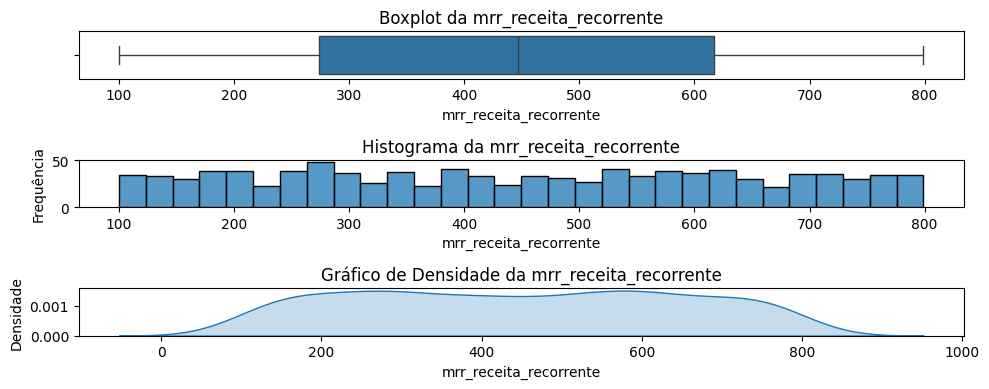

In [45]:
plot_numerical_column_distrubtion(num_attributes, 'mrr_receita_recorrente')

### 2.2.3. Analiase da coluna `nrr_receita_nao_recorrente` 

#### Tipo de Dados e Valores Únicos

- **Tipo:** Valores inteiros não negativos.
- **Valores Únicos:** 389, indicando diversidade moderada, com menos repetições que a coluna `mrr_receita_recorrente`.

---

#### Distribuição dos Dados

**Boxplot:**  
- Valores distribuídos entre 0 e 500, com possíveis outliers acima de 500.  
- Concentração principal na faixa 0–300, onde a maioria dos dados está agrupada.

**Gráfico de Densidade:**  
- Pico de densidade próximo a 0.002 na faixa inicial (0–200), com declínio suave até 600.  
- Valores acima de 500 têm densidade próxima de zero, reforçando sua raridade.

---

#### Insights e Observações

- **Distribuição Assimétrica à Direita:** A maioria dos valores é baixa (ex.: 67–352), com cauda longa para valores mais altos (até 600).  
- **Possíveis Outliers:** Valores acima de 500 são incomuns e merecem investigação (ex.: erros de registro ou transações atípicas).  
- **Variação nos Valores Baixos:** A presença de valores como 67 e 114 indica heterogeneidade mesmo na faixa inferior, possivelmente refletindo diferentes perfis de clientes ou transações pontuais.

In [46]:
print_column_unique_values_info(num_attributes, 'nrr_receita_nao_recorrente')

Tipo da coluna: int64
Quantidade de Valores Únicos: 389
5 primeiros Valores Únicos: [242 352  67 328 114]


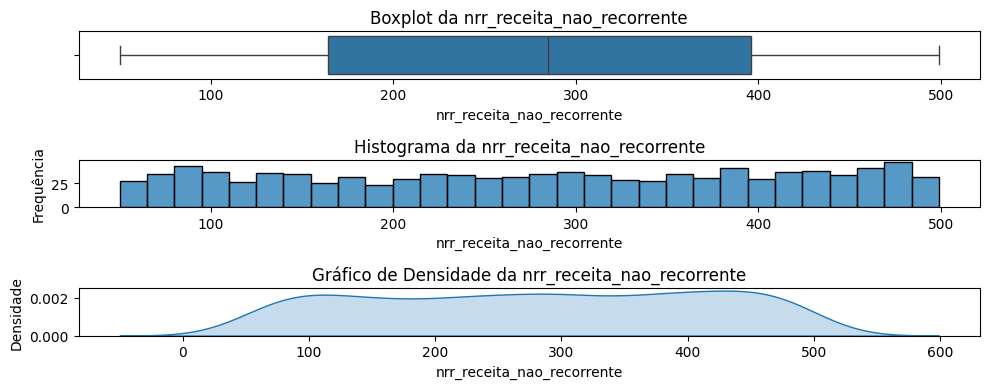

In [47]:
plot_numerical_column_distrubtion(num_attributes, 'nrr_receita_nao_recorrente')

### 2.2.4. Analiase da coluna `churn_rate`

#### Tipo de Dados e Valores Únicos

- **Tipo:** Valores decimais.  
- **Valores Únicos:** 4, indicando baixa diversidade e possivelmente categorização prévia ou agrupamento intencional.

---

#### Distribuição dos Dados

**Boxplot:**  
- Valores variam de 0.075 a 0.25, com concentração principal entre 0.10 e 0.15.  
- Possíveis outliers acima de 0.25 (se houver registros nessa faixa).

**Histograma e Gráfico de Densidade:**  
- Distribuição concentrada em 0.07–0.25, com densidade máxima entre 0.10 e 0.15.  
- Menor frequência em extremos (ex.: abaixo de 0.05 ou acima de 0.25).

---

#### Insights e Observações

- **Categorização Suspeita:** Apenas 4 valores únicos sugerem que os dados podem estar agrupados em faixas (ex.: baixo, médio, alto) ou que há limitações na coleta.  
- **Valores Críticos:** A taxa de 0.25 (25%) destaca-se como um ponto crítico, possivelmente ligado a segmentos específicos (ex.: clientes insatisfeitos ou planos com alta rotatividade).  
- **Baixa Granularidade:** A falta de valores intermediários dificulta análises detalhadas (ex.: diferenças entre 0.11 e 0.14 podem ser mascaradas).

In [48]:
print_column_unique_values_info(num_attributes, 'churn_rate')

Tipo da coluna: float64
Quantidade de Valores Únicos: 4
5 primeiros Valores Únicos: [0.07 0.11 0.25 0.14]


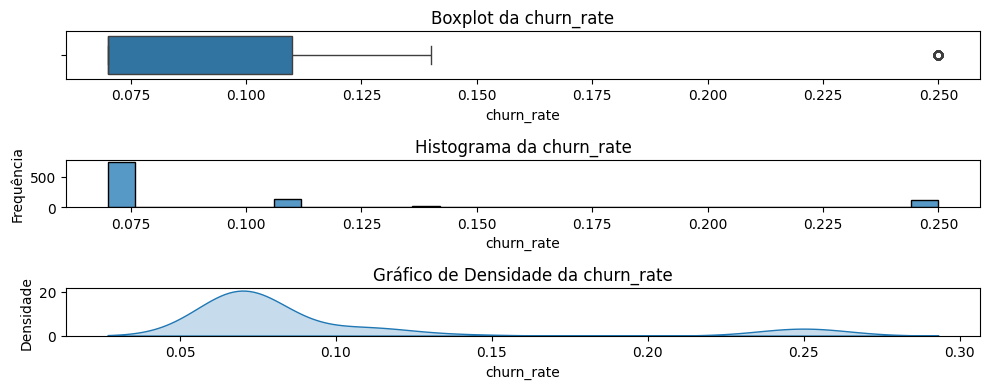

In [49]:
plot_numerical_column_distrubtion(num_attributes, 'churn_rate')

## 2.3. Categorical Attributes

In [50]:
cat_attributes.columns

Index(['vendedor', 'plano', 'periodicidade'], dtype='object')

In [51]:
get_categorical_info(cat_attributes)

,attributes,nan (%),dtype,unique,mode,mode_freq
2,periodicidade,0.000,object,3,Mensal,845
0,vendedor,0.000,object,5,Igor Martins,639
1,plano,0.000,object,6,Astrea Starter,696


### 2.3.1 Analise da coluna `periodicidade`


#### Distribuição das Categorias

---

- **Total de Valores Únicos:** 3 (`Mensal`, `Anual`, `Semestral`).

**Frequências:**  
- `Mensal`: 845 ocorrências (84.5% do total, assumindo 999 registros).  
- `Anual`: 144 ocorrências (14.4%).  
- `Semestral`: 10 ocorrências (1%).

**Dominância:**  
- A categoria `Mensal` é esmagadoramente predominante, seguida por `Anual` e `Semestral` com participação marginal.

---

#### Princípio de Pareto (80/20)

- **Aplicação:** Apenas `Mensal` (84.5%) e `Anual` (14.4%) representam 98.9% dos dados, enquanto `Semestral` contribui com apenas 1%.  
- **Implicação:** Esforços estratégicos devem priorizar as categorias `Mensal` e `Anual`, que são críticas para a maioria dos casos.

---

#### Insights e Observações

- **Baixa Representatividade de `Semestral`:**  
    Com apenas 10 registros, essa categoria pode ser insignificante estatisticamente ou representar casos específicos (ex.: contratos sazonais ou nichos).  
    Recomenda-se validar se esses registros são legítimos ou se há erros de categorização.

- **Ausência de Outras Categorias:**  
    Não há registros de outras periodicidades (ex.: trimestral, quinzenal), o que pode limitar análises mais detalhadas.

In [52]:
get_top_values(cat_attributes, 'periodicidade')

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 15 mais frequentes em "periodicidade"
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
periodicidade
Mensal       845
Anual        144
Semestral     10
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Total Unique: 3


array(['Mensal', 'Anual', 'Semestral'], dtype=object)

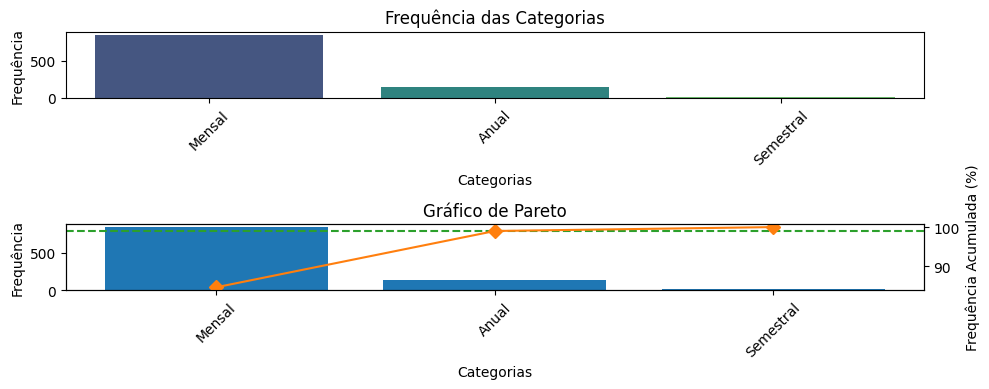

In [53]:
plot_categorical_eda(cat_attributes, 'periodicidade')

### 2.3.2 Analise da coluna `vendedor`

#### Distribuição das Categorias

- **Total de Valores Únicos:** 5 vendedores.

**Frequências:**  
- Igor Martins: 639 ocorrências (~63.9% do total).  
- Rafael Cunha: 126 (~12.6%).  
- Fernanda Dias: 115 (~11.5%).  
- Bruna Lopes: 103 (~10.3%).  
- Larissa Melo: 16 (~1.6%).

**Dominância:**  
- Igor Martins concentra mais de 60% das vendas, enquanto os demais vendedores têm participação significativamente menor.

---

#### Princípio de Pareto (80/20)

- **Aplicação:** Igor Martins, Rafael Cunha e Fernanda Dias (totalizando ~88% das vendas) representam a grande maioria dos registros, seguindo o padrão 80/20.  
- **Implicação:** Esses três vendedores são críticos para o desempenho geral, enquanto Bruna Lopes e Larissa Melo têm contribuição marginal.

---

#### Insights e Observações

- **Desequilíbrio Significativo:**  
    Igor Martins é claramente o vendedor-chave, possivelmente responsável por clientes estratégicos ou com maior volume de transações.  
    A baixa frequência de Larissa Melo (1.6%) sugere que ela pode ser nova na equipe, estar alocada em um nicho específico ou enfrentar desafios de desempenho.

- **Equipe Enxuta:**  
    Apenas 5 vendedores indicam uma equipe pequena ou dados restritos a um subset específico (ex.: regional).

- **Ausência de Outliers Negativos:**  
    Não há registros com valores inconsistentes (ex.: nomes repetidos com grafia errada), indicando boa consistência nos dados.


In [54]:
get_top_values(cat_attributes, 'vendedor')

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 15 mais frequentes em "vendedor"
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
vendedor
Igor Martins     639
Rafael Cunha     126
Fernanda Dias    115
Bruna Lopes      103
Larissa Melo      16
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Total Unique: 5


array(['Igor Martins', 'Rafael Cunha', 'Fernanda Dias', 'Bruna Lopes',
       'Larissa Melo'], dtype=object)

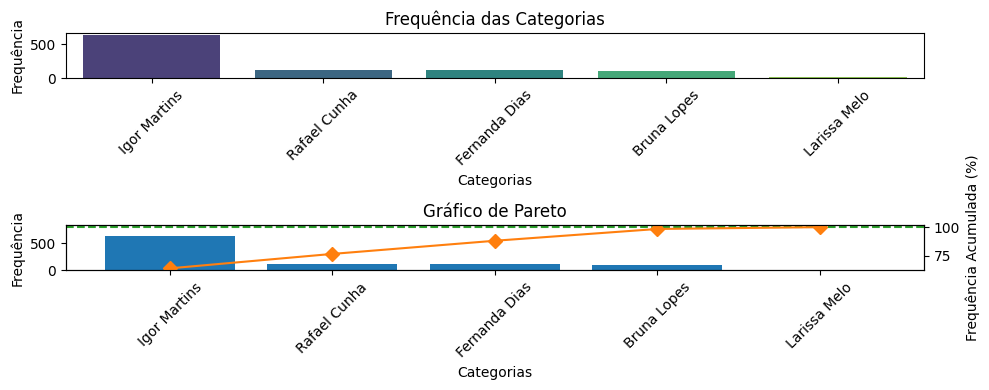

In [55]:
plot_categorical_eda(cat_attributes, 'vendedor')

### 2.3.3 Analise da coluna `plano`

#### Distribuição das Categorias (`plano`)

---

- **Total de Valores Únicos:** 6 planos.

**Frequências:**  
- Astrea Starter: 696 ocorrências (69.6% do total).  
- Astrea Pro: 196 (19.6%).  
- Up: 59 (5.9%).  
- Smart: 29 (2.9%).  
- Company: 15 (1.5%).  
- Vip: 4 (0.4%).

**Dominância:**  
- Astrea Starter e Astrea Pro representam 89.2% dos registros, indicando foco da base de clientes em planos básicos e intermediários.

---

#### Princípio de Pareto (80/20)

- **Aplicação:** Os dois primeiros planos (Astrea Starter e Astrea Pro) concentram quase 90% das ocorrências, alinhando-se ao princípio de que poucas categorias geram a maioria dos resultados.  
- **Implicação:** Esses planos são estratégicos para receita e retenção de clientes.

---

#### Insights e Observações

- **Hegemonia do Astrea Starter:**  
    Provavelmente é o plano de entrada, com preço acessível ou funcionalidades essenciais, atraindo a maioria dos clientes.

- **Potencial de Upsell:**  
    A diferença entre Astrea Starter (69.6%) e Astrea Pro (19.6%) sugere oportunidade para migração de clientes para o plano premium.

- **Planos de Nicho:**  
    Planos como Vip (0.4%) e Company (1.5%) podem ser direcionados a clientes específicos (ex.: corporativos ou high-end), mas têm participação insignificante.

- **Possíveis Inconsistências:**  
    A presença de Up (5.9%) e Smart (2.9%) sem contexto claro sugere a necessidade de validar se são planos ativos ou resquícios de categorias antigas.


In [56]:
get_top_values(cat_attributes, 'plano')

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top 15 mais frequentes em "plano"
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
plano
Astrea Starter    696
Astrea Pro        196
Up                 59
Smart              29
Company            15
Vip                 4
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Total Unique: 6


array(['Astrea Starter', 'Astrea Pro', 'Up', 'Smart', 'Company', 'Vip'],
      dtype=object)

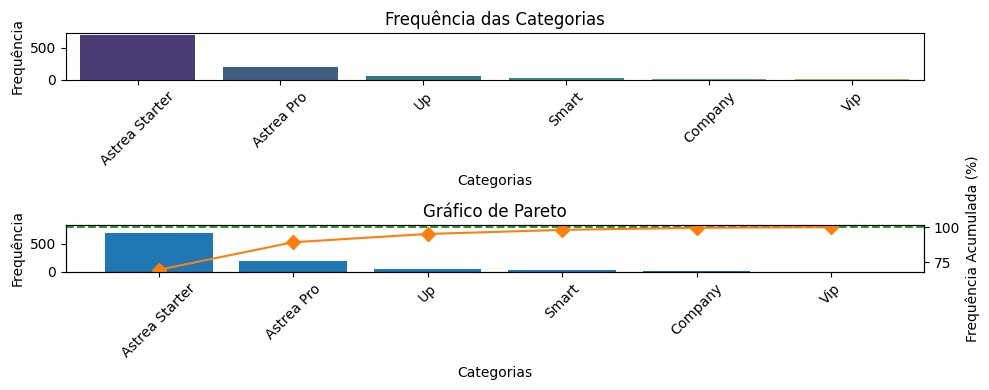

In [57]:
plot_categorical_eda(cat_attributes, 'plano')

## 2.4. Date Attributes

In [58]:
date_attributes.columns

Index(['won_time'], dtype='object')

### 2.4.1 Analise de colunas `won_time`

#### Contagem Diária de `won_time`

- Observa-se uma forte concentração de registros entre janeiro e agosto de 2022, com muitos dias tendo entre 5 e 15 registros.
- Depois de setembro de 2022, a frequência cai drasticamente, praticamente zerando nos meses seguintes.
- Isso sugere:
    - Ou o encerramento de operações,
    - Ou falha/inatividade no registro de novos dados após setembro de 2022,
    - Ou uma limitação do conjunto de dados (ex.: recorte temporal aplicado).

---

#### Frequência Mensal de `won_time`

- Os meses de **janeiro a agosto de 2022** têm os maiores volumes, com pico notável em janeiro, abril e maio.
- A partir de setembro de 2022, a frequência mensal desaba, permanecendo muito baixa até agosto de 2023.
- Essa queda brusca reforça a necessidade de verificar se há falha de ingestão, mudanças no processo de negócio ou perda de registros.

---

#### Distribuição Diária de `won_time` (Boxplot)

- O boxplot mostra a distribuição de registros por dia do mês (1–31).
- Há uma boa dispersão, com registros presentes em praticamente todos os dias, mas:
    - Dias no início e meio do mês (1–15) apresentam ligeiramente mais registros.
    - Existem alguns outliers, indicando dias atípicos com volumes muito altos (acima de 10–12).
    - A mediana diária varia de 3 a 6, mostrando certa estabilidade, mas não perfeitamente uniforme.

---

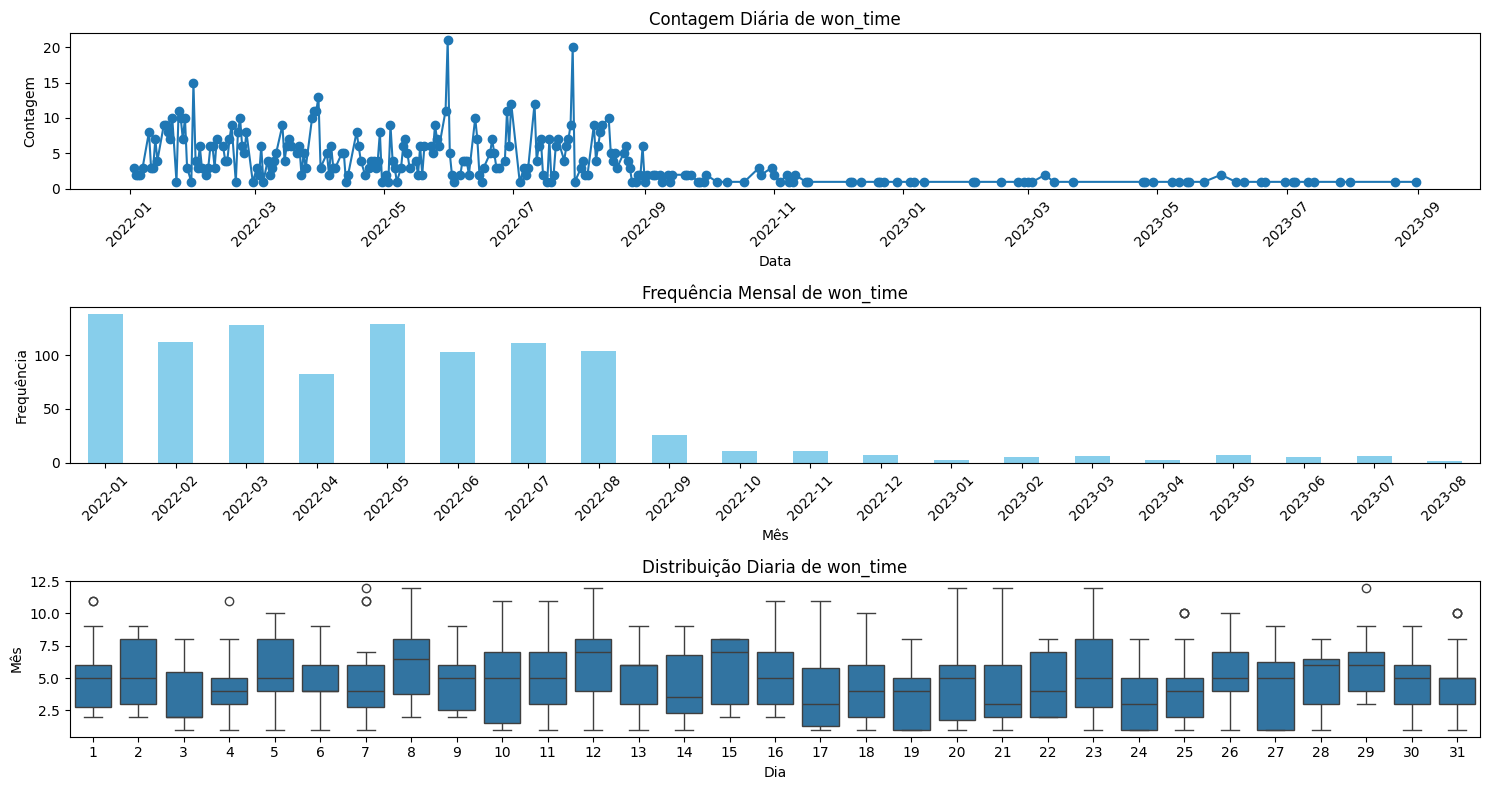

In [59]:
plot_temporal_column_distribution(date_attributes, 'won_time')

# 3.0 Feature Engineering

In [60]:
df3 = df2.copy()

In [61]:
print(f"Total de linhas: {df3.shape[0]}")
print(f"Total de colunas: {df3.shape[1]}")

Total de linhas: 999
Total de colunas: 9


In [62]:
df3.head(2)

,id,won_time,vendedor,mrr_receita_recorrente,nrr_receita_nao_recorrente,pipeline_id,plano,periodicidade,churn_rate
0,704867,2022-03-25,Igor Martins,669,242,16,Astrea Starter,Mensal,0.070
1,533495,2022-06-21,Rafael Cunha,558,352,16,Astrea Starter,Mensal,0.110


## 3.1 Feature Temporais

In [63]:
df3['won_time'] = pd.to_datetime(df3['won_time'])

df3['ano'] = df3['won_time'].dt.year
df3['mes'] = df3['won_time'].dt.month
df3['dia'] = df3['won_time'].dt.day

df3['ano_mes'] = df3['won_time'].dt.to_period('M').dt.to_timestamp()

df3['dia_da_semana'] = df3['won_time'].dt.dayofweek 
df3['semana_do_ano'] = df3['won_time'].dt.isocalendar().week
df3['nome_mes'] = df3['won_time'].dt.month_name()
df3['nome_dia_semana'] = df3['won_time'].dt.day_name()
df3['eh_final_de_semana'] = df3['dia_da_semana'] >= 5

## 3.2 Feature Proporções e Somatorios

In [64]:
df3['receita_total'] = df3['mrr_receita_recorrente'] + df3['nrr_receita_nao_recorrente']
df3['proporcao_mrr_nrr'] = df3['mrr_receita_recorrente'] / df3['receita_total'].replace(0, np.nan)

## 3.3 Feature Flags

In [65]:
df3['mrr_categoria'] = pd.qcut(df3['mrr_receita_recorrente'], q=3, labels=['baixo', 'medio', 'alto'])

## 3.4 Feature Churn Alto

In [66]:
df3['churn_alto'] = df3['churn_rate'] > 0.1

## 3.5 Feature Quantidade

In [67]:
df3['qtd_vendas_totais'] = df3.groupby('vendedor')['id'].transform('count')
df3['qtd_vendas_ano'] = df3.groupby(['vendedor', df3['won_time'].dt.to_period('Y')])['id'].transform('count')
df3['qtd_vendas_mensais'] = df3.groupby(['vendedor', df3['won_time'].dt.to_period('M')])['id'].transform('count')
df3['qtd_vendas_semanal'] = df3.groupby(['vendedor', df3['won_time'].dt.to_period('W')])['id'].transform('count')


df3['qtd_tipos_planos_mes'] = df3.groupby(['vendedor', df3['won_time'].dt.to_period('M')])['plano'].transform('nunique')
df3['qtd_tipos_planos_ano'] = df3.groupby(['vendedor', df3['won_time'].dt.to_period('Y')])['plano'].transform('nunique')
df3['qtd_tipos_planos_vendidos'] = df3.groupby('vendedor')['plano'].transform('nunique')

In [68]:
df3 = df3.sort_values(by=['vendedor', 'won_time'])

In [69]:
df3['dias_entre_vendas'] = df3.groupby('vendedor')['won_time'].diff().dt.days
df3['dias_sem_venda'] = (df3['dias_entre_vendas'] - 1).clip(lower=0)
df3['dias_sem_venda'] = df3['dias_sem_venda'].fillna(0)

In [70]:
tempo_medio = df3.groupby(['vendedor', 'ano', 'mes'])['dias_entre_vendas'].mean().reset_index()
tempo_medio.rename(columns={'dias_entre_vendas': 'tempo_medio_entre_vendas'}, inplace=True)
df3 = pd.merge(df3, tempo_medio, on=['vendedor', 'ano', 'mes'], how='left')

In [71]:
df3 = df3.drop(columns=['dias_entre_vendas'])

## 3.6 Feature Comissão

In [72]:
df3['comissao_percentual'] = np.where(df3['qtd_vendas_mensais'] >= 30, 0.015, 0.01)
df3['valor_comissao'] = df3['mrr_receita_recorrente'] * df3['comissao_percentual']

## 3.7 Feature Desempenho

In [73]:
conditions = [
    df3['qtd_vendas_mensais'] < 10,
    (df3['qtd_vendas_mensais'] >= 10) & (df3['qtd_vendas_mensais'] < 30),
    df3['qtd_vendas_mensais'] >= 30
]
choices = ['abaixo_da_meta', 'proximo_da_meta', 'atingiu_meta']
df3['categoria_desempenho'] = np.select(conditions, choices)

In [74]:
df3.sample(2)

,id,won_time,vendedor,mrr_receita_recorrente,nrr_receita_nao_recorrente,pipeline_id,plano,periodicidade,churn_rate,ano,mes,dia,ano_mes,dia_da_semana,semana_do_ano,nome_mes,nome_dia_semana,eh_final_de_semana,receita_total,proporcao_mrr_nrr,mrr_categoria,churn_alto,qtd_vendas_totais,qtd_vendas_ano,qtd_vendas_mensais,qtd_vendas_semanal,qtd_tipos_planos_mes,qtd_tipos_planos_ano,qtd_tipos_planos_vendidos,dias_sem_venda,tempo_medio_entre_vendas,comissao_percentual,valor_comissao,categoria_desempenho
923,400657,2022-04-25,Rafael Cunha,205,249,16,Astrea Starter,Mensal,0.110,2022,4,25,2022-04-01,0,17,April,Monday,False,454,0.452,baixo,True,126,112,8,3,1,6,6,4.000,3.500,0.010,2.050,abaixo_da_meta
315,478466,2022-01-31,Igor Martins,799,142,16,Astrea Starter,Anual,0.070,2022,1,31,2022-01-01,0,5,January,Monday,False,941,0.849,alto,False,639,629,103,18,2,6,6,0.000,0.275,0.015,11.985,atingiu_meta


## 3.5 Save

### 3.5.1 Processed Data

In [75]:
save_data_csv(df3.sort_values(by=['won_time']), '../data/processed/processed_data.csv')

Arquivo salvo com sucesso em: ../data/processed/processed_data.csv


### 3.5.2 Delivery Data

In [76]:
df3.head(2).T

,0,1
id,240780,592692
won_time,2022-01-03 00:00:00,2022-01-10 00:00:00
vendedor,Bruna Lopes,Bruna Lopes
mrr_receita_recorrente,404,652
nrr_receita_nao_recorrente,287,362
pipeline_id,36,36
plano,Astrea Starter,Astrea Starter
periodicidade,Mensal,Mensal
churn_rate,0.070,0.070
ano,2022,2022


In [77]:
df3.dtypes

id                                     int32
won_time                      datetime64[ns]
vendedor                              object
mrr_receita_recorrente                 int64
nrr_receita_nao_recorrente             int64
pipeline_id                            int32
plano                                 object
periodicidade                         object
churn_rate                           float64
ano                                    int32
mes                                    int32
dia                                    int32
ano_mes                       datetime64[ns]
dia_da_semana                          int32
semana_do_ano                         UInt32
nome_mes                              object
nome_dia_semana                       object
eh_final_de_semana                      bool
receita_total                          int64
proporcao_mrr_nrr                    float64
mrr_categoria                       category
churn_alto                              bool
qtd_vendas

In [ ]:
analise = df3.groupby(['ano', 'mes', 'vendedor']).agg({
    'receita_total': 'sum',
    'mrr_receita_recorrente': 'sum',
    'nrr_receita_nao_recorrente': 'sum',
    'plano': 'count',
    'qtd_vendas_mensais': 'mean',
    'churn_rate': 'mean',
    'valor_comissao': 'sum'
}).reset_index()

analise.columns = [
    'Ano',
    'Mês',
    'Vendedor',
    'Receita Total',
    'MRR Total',
    'NRR Total',
    'Vendas Totais',
    'Vendas Mensais (Média)',
    'Churn Rate (Média)',
    'Comissão Total'
]

formato = {
    'Receita Total': 'R${:,.2f}',
    'MRR Total': 'R${:,.2f}',
    'NRR Total': 'R${:,.2f}',
    'Vendas Mensais (Média)': '{:.1f}',
    'Churn Rate (Média)': '{:.2%}',
    'Comissão Total': 'R${:,.2f}'
}

In [79]:
analise.head(2).T

,0,1
Ano,2022,2022
Mês,1,1
Vendedor,Bruna Lopes,Fernanda Dias
Receita Total,7211,5378
MRR Total,4518,3566
NRR Total,2693,1812
Vendas Totais,9,6
Vendas Mensais (Média),9.000,6.000
Churn Rate (Média),0.070,0.250
Comissão Total,45.180,35.660


In [80]:
save_data_excel(analise, '../data/delivery/analise_vendas.xlsx')

Arquivo salvo com sucesso em: ../data/delivery/analise_vendas.xlsx
